In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from calculator import calculate
%config InlineBackend.figure_format='retina'

# Load example data.
data = pd.read_csv('example_user.csv')
data = dict(zip(data['biomarker'],data['value']))

# Run calculator.
results = calculate(data)

# Print results.
print(f"age       = {results['age']:.2f} years")
print(f"lin_age   = {results['lin_age']:.2f} years")
print(f"lin_age_2 = {results['lin_age_2']:.2f} years")


age       = 77.17 years
lin_age   = 71.39 years
lin_age_2 = 72.12 years


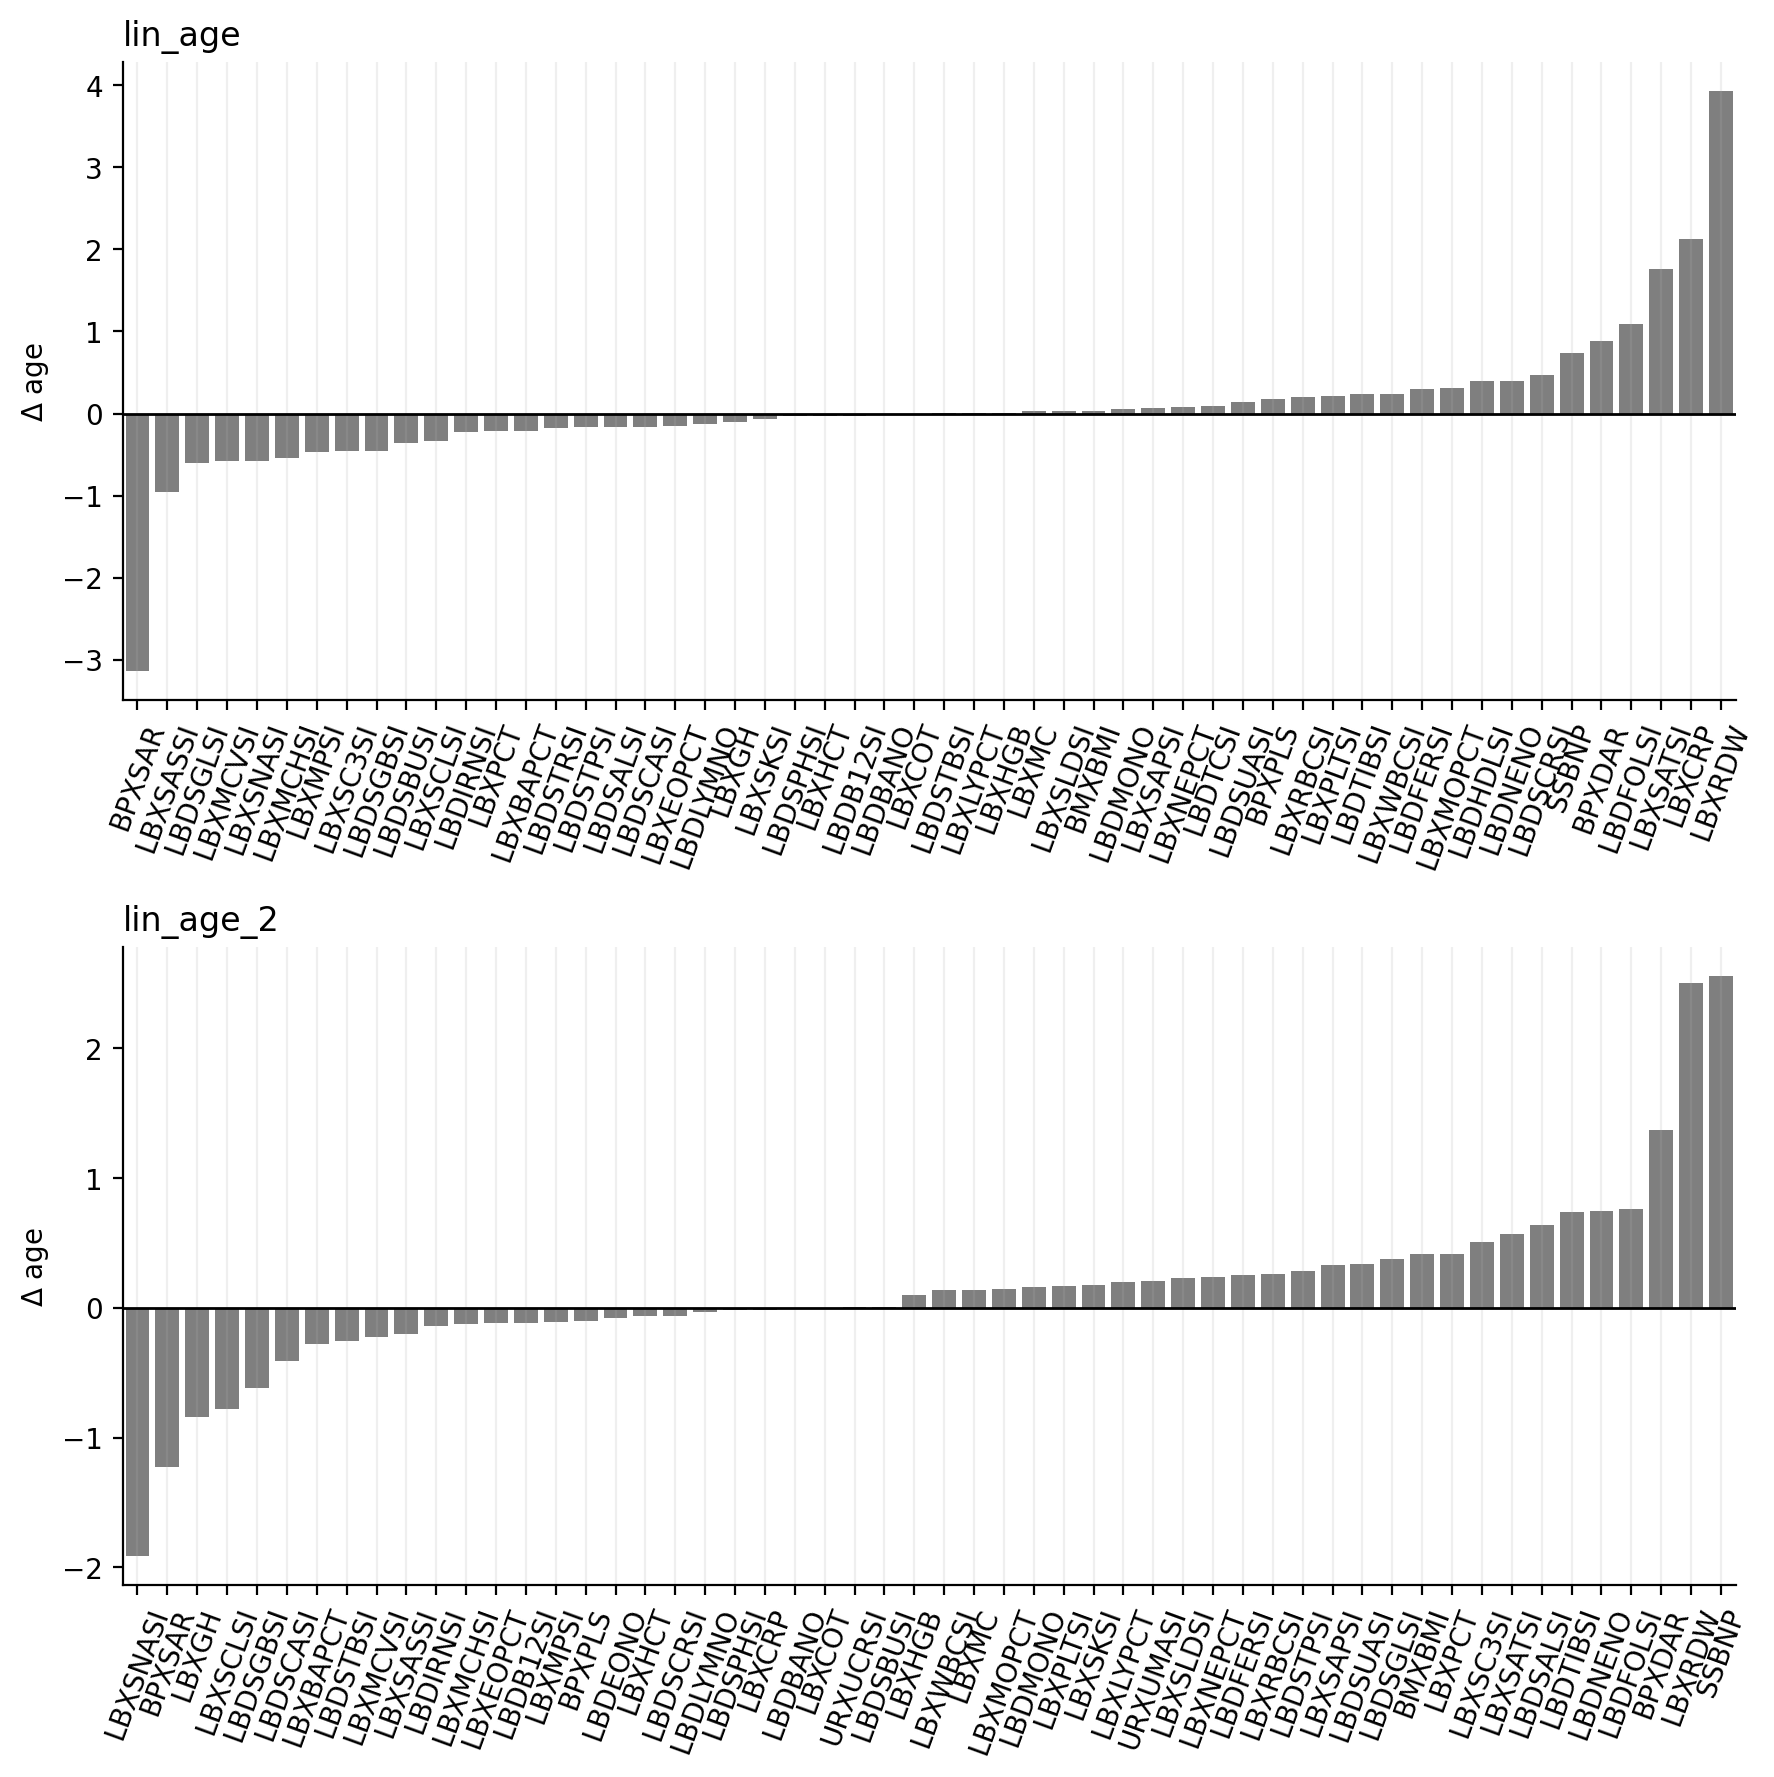

In [2]:
# Print contribution of each biomarker to delta-age.

fig, ax = plt.subplots(2, 1, figsize=(9, 9))

for idx, model in enumerate(['lin_age','lin_age_2']):

    weights = results[f'{model}__contributions'].sort_values().dropna()
    weights = weights.drop(index=['RIDAGEEX','constant'])

    sns.barplot(weights, orient='v', ax=ax[idx], color='tab:gray')
    sns.despine(ax=ax[idx])

    ax[idx].set_ylabel('$\Delta$ age')
    ax[idx].tick_params(axis='x', rotation=70)
    ax[idx].axhline(0, color='k', lw=1)
    ax[idx].grid(linestyle='-', axis='x', alpha=.2)
    ax[idx].set_title(model, loc='left')

plt.tight_layout()
plt.show()


In [ ]:
# See model files for expected units and biomarker names:
for model in ['lin_age','lin_age_2']:

    print(f'{model}:')
    df_model = pd.read_csv(f'calculator/models/{model}.csv')
    print(df_model[['biomarker','description']])


lin_age:
   biomarker                               description
0     BPXPLS               Pulse (30 second pulse x 2)
1     BPXSAR    Systolic blood pressure average (mmHg)
2     BPXDAR   Diastolic blood pressure average (mmHg)
3     BMXBMI                   Body mass index (kg/m2)
4   LBDIRNSI                             Iron (umol/L)
..       ...                                       ...
58  fs3Score                      Healthcare use index
59      LDLV          Low-density lipoprotein (mmol/L)
60  crAlbRat  Urine albumin-to-creatinine ratio (mg/g)
61  RIDAGEEX                Chronological age (months)
62  constant                               C0 Constant

[63 rows x 2 columns]
lin_age_2:
   biomarker                        description
0   RIDAGEEX         Chronological Age (months)
1     BMXBMI        Log Body Mass Index (kg/m2)
2     BPXSAR     Systolic Blood Pressure (mmHg)
3     BPXDAR    Diastolic Blood Pressure (mmHg)
4     BPXPLS                   Pulse Rate (bpm)
..       